## Imports

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Load the dataset

In [11]:
file_path = 'data/ai4i2020.csv'  # Update the path as per your directory structure
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float6

## Feature exploration

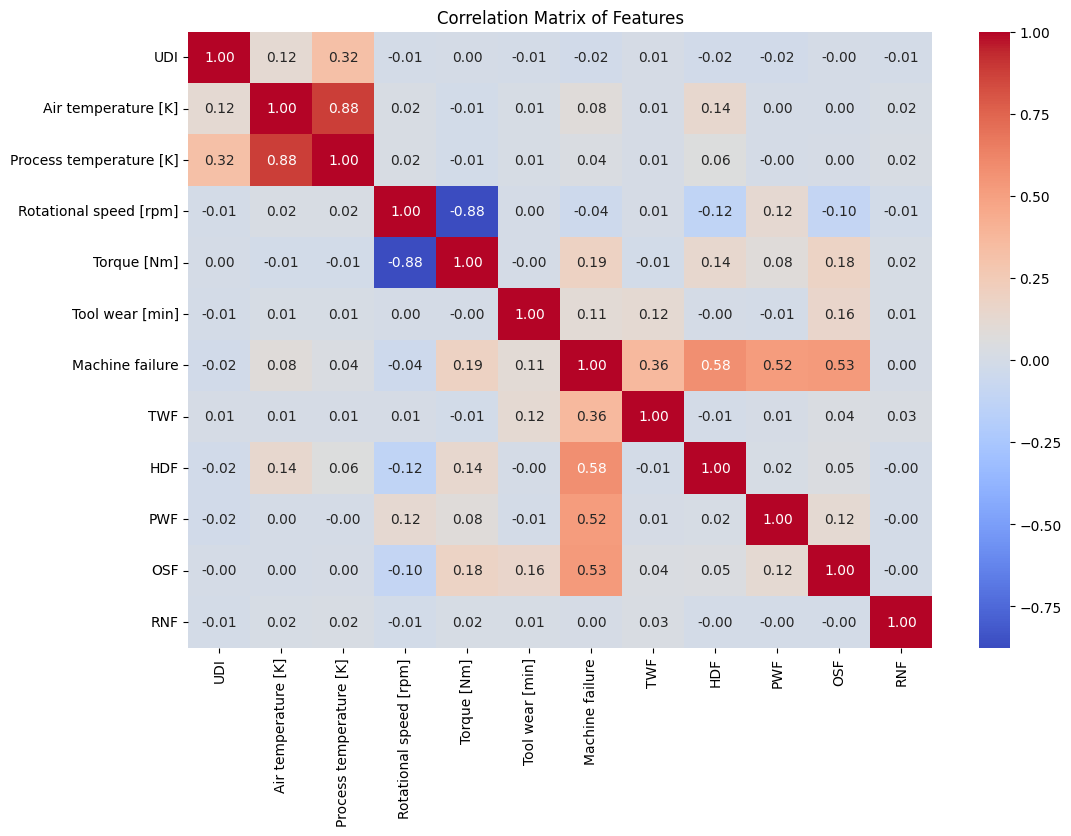

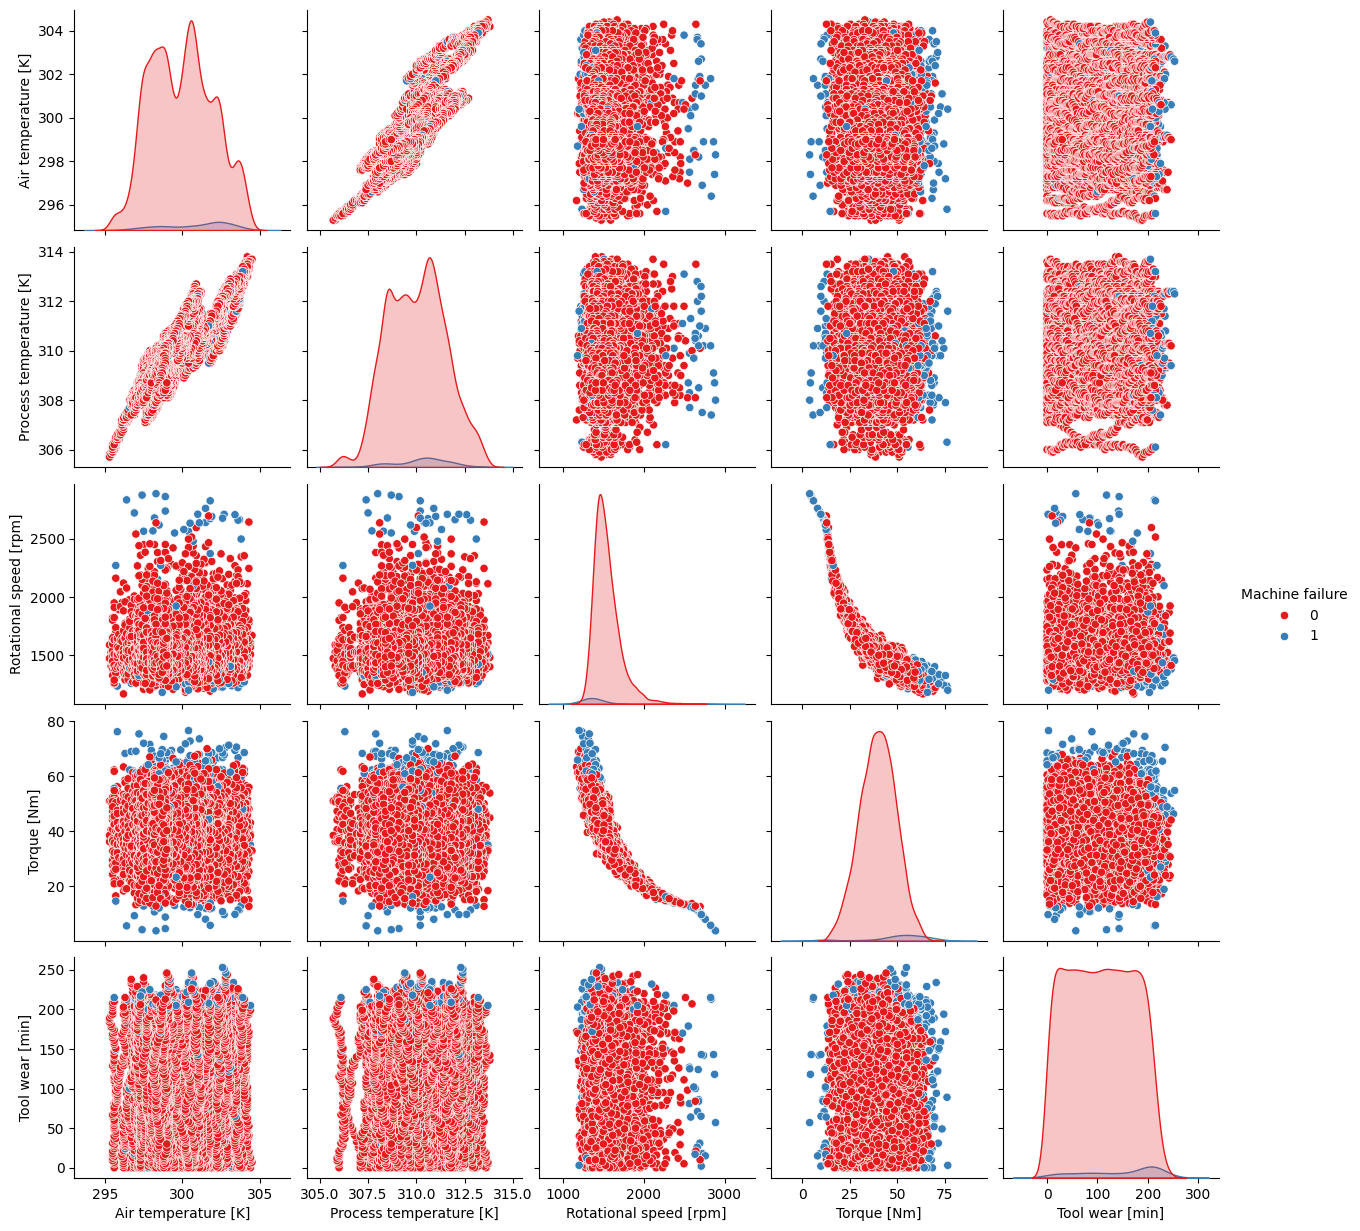

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\2234199689.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=feature, data=data, palette='Set2')


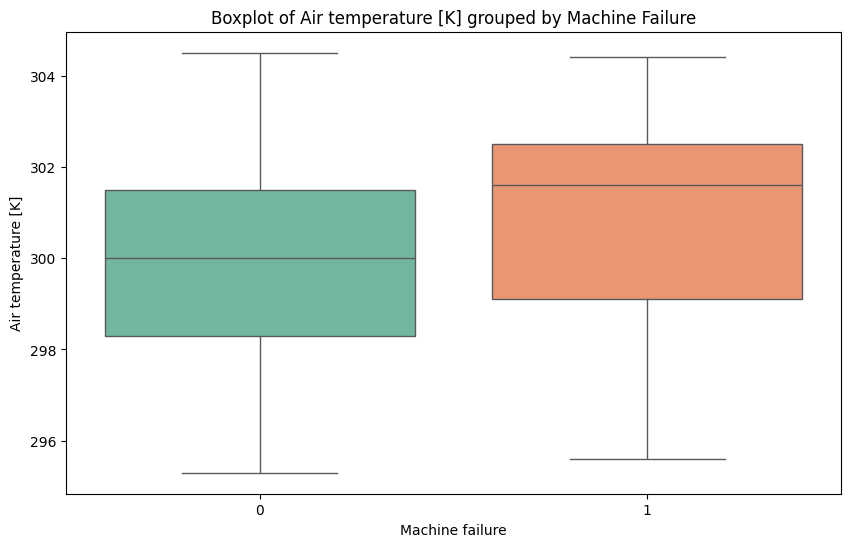

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\2234199689.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=feature, data=data, palette='Set2')


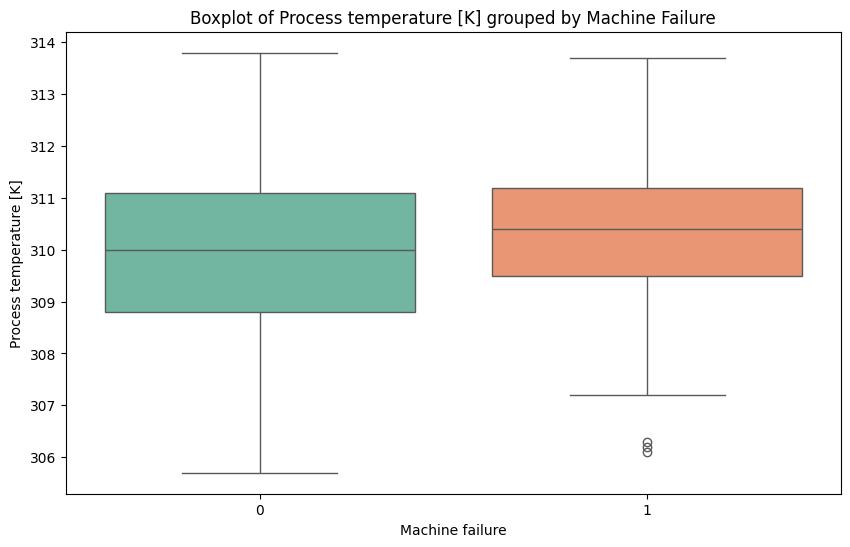

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\2234199689.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=feature, data=data, palette='Set2')


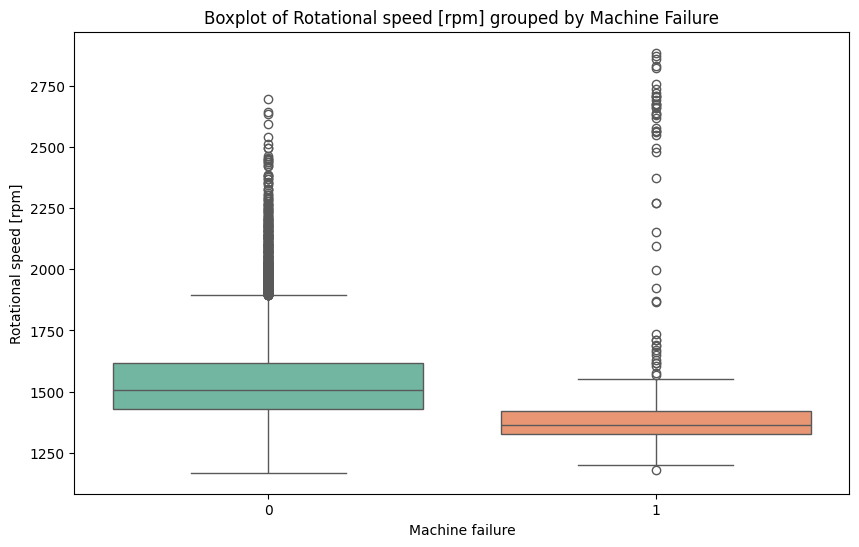

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\2234199689.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=feature, data=data, palette='Set2')


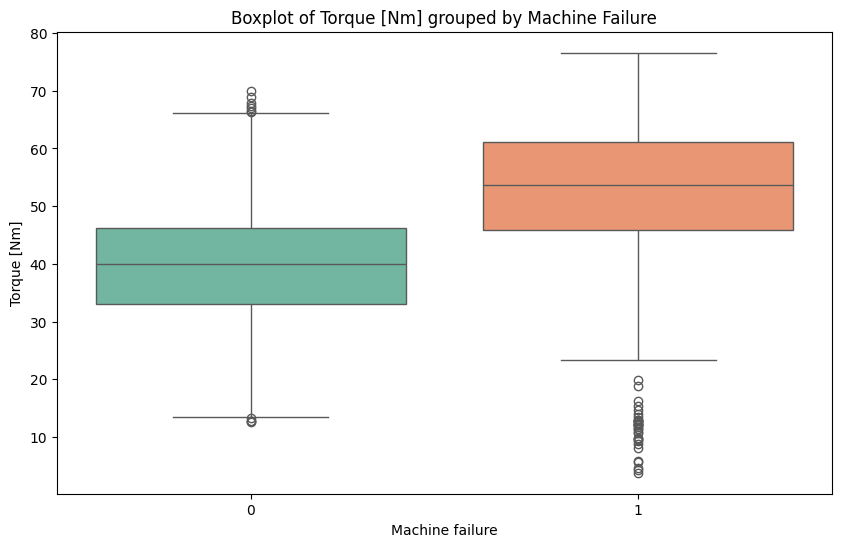

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\2234199689.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=feature, data=data, palette='Set2')


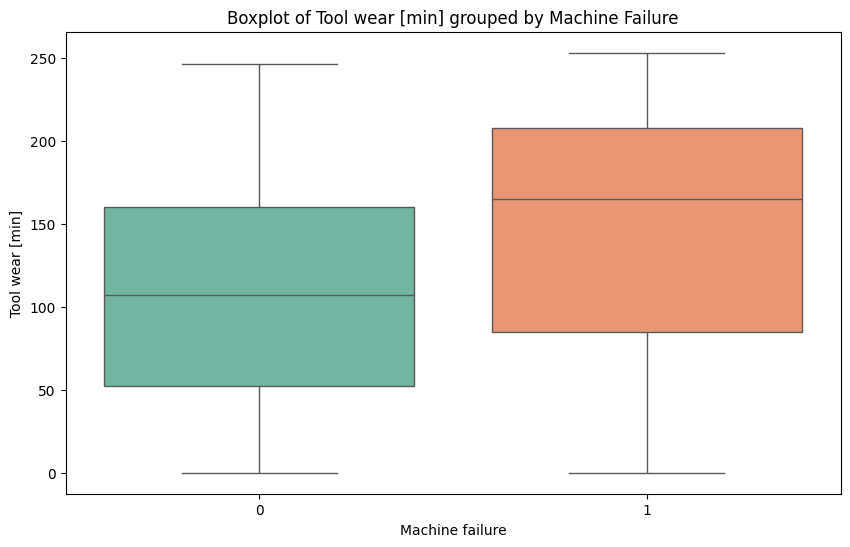

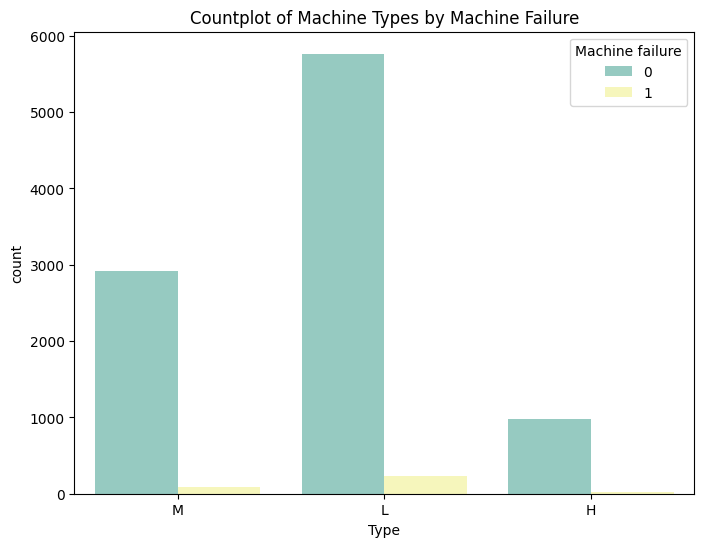

In [12]:


# Plot heatmap to visualize feature correlations
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot to analyze relationships between features
selected_features = ['Air temperature [K]', 'Process temperature [K]', 
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']
sns.pairplot(data[selected_features], hue='Machine failure', palette='Set1', diag_kind='kde')
plt.show()

# Boxplot for continuous variables grouped by 'Machine failure'
continuous_features = ['Air temperature [K]', 'Process temperature [K]', 
                       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Machine failure', y=feature, data=data, palette='Set2')
    plt.title(f'Boxplot of {feature} grouped by Machine Failure')
    plt.show()

# Countplot for categorical variable 'Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', hue='Machine failure', data=data, palette='Set3')
plt.title('Countplot of Machine Types by Machine Failure')
plt.show()


## Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder

# Copy original data to preserve the raw dataset
data_fe = data.copy()

# 1. Feature Transformation: Scaling 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_fe[['Air temperature [K]', 'Process temperature [K]', 
                                                'Rotational speed [rpm]', 'Torque [Nm]', 
                                                'Tool wear [min]']])
scaled_df = pd.DataFrame(scaled_features, columns=['Scaled_Air_temp', 'Scaled_Process_temp', 
                                                   'Scaled_Rotational_speed', 'Scaled_Torque', 
                                                   'Scaled_Tool_wear'])
data_fe = pd.concat([data_fe, scaled_df], axis=1)

#2. Feature Interaction: Interaction Terms and Ratios
data_fe['Torque_RPM'] = data_fe['Torque [Nm]'] * data_fe['Rotational speed [rpm]']
data_fe['Temp_Difference'] = data_fe['Process temperature [K]'] - data_fe['Air temperature [K]']

# 3. Feature Binning: Tool Wear
data_fe['Tool_Wear_Bin'] = pd.cut(data_fe['Tool wear [min]'], bins=[0, 100, 200, 300], 
                                  labels=['Low', 'Medium', 'High'])

# 4. Aggregate Features
# Failure Count: Sum of all failure indicators
failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
data_fe['Failure_Count'] = data_fe[failure_columns].sum(axis=1)

# 5. Encoding Categorical Variables
# One-Hot Encoding for 'Type'
type_encoded = pd.get_dummies(data_fe['Type'], prefix='Type')
data_fe = pd.concat([data_fe, type_encoded], axis=1)

# Dropping the original Type column (optional, as we now have encoded columns)
data_fe.drop(columns=['Type'], inplace=True)

# 6. Dropping irrelevant columns (optional)
# Dropping 'UDI' and 'Product ID' as they are identifiers and not useful for modeling
data_fe.drop(columns=['UDI', 'Product ID'], inplace=True)

# 7. use lable encoder to transform bools to ints
label_encoder = LabelEncoder()
data_fe['Type_H'] = label_encoder.fit_transform(data_fe['Type_H'])
data_fe['Type_M'] = label_encoder.fit_transform(data_fe['Type_M'])
data_fe['Type_L'] = label_encoder.fit_transform(data_fe['Type_L'])
data_fe['Tool_Wear_Bin'] = label_encoder.fit_transform(data_fe['Tool_Wear_Bin'])

# Display the updated dataset with new features
print(data_fe.head())

# Display basic information about the dataset
print("Dataset Info:")
print(data_fe.info())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  ...  \
0         42.8                0                0    0    0    0    0  ...   
1         46.3                3                0    0    0    0    0  ...   
2         49.4                5                0    0    0    0    0  ...   
3         39.5                7                0    0    0    0    0  ...   
4         40.0                9                0    0    0    0    0  ...   

   Scaled_Rotational_speed  Scaled_Torque  Scaled_Tool_wear  Torque_RPM  \
0          

## visualize the newly engineered features


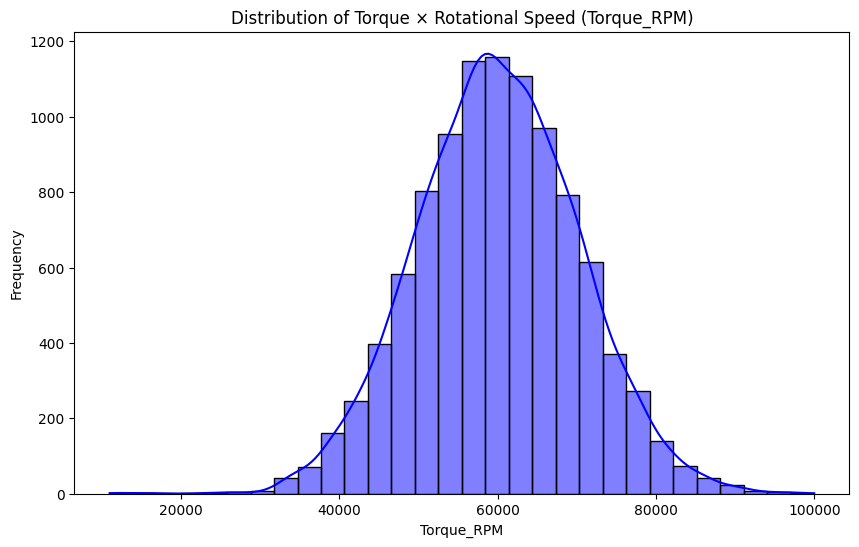

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\3505640987.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Failure_Count', data=data_fe, palette='Set2')


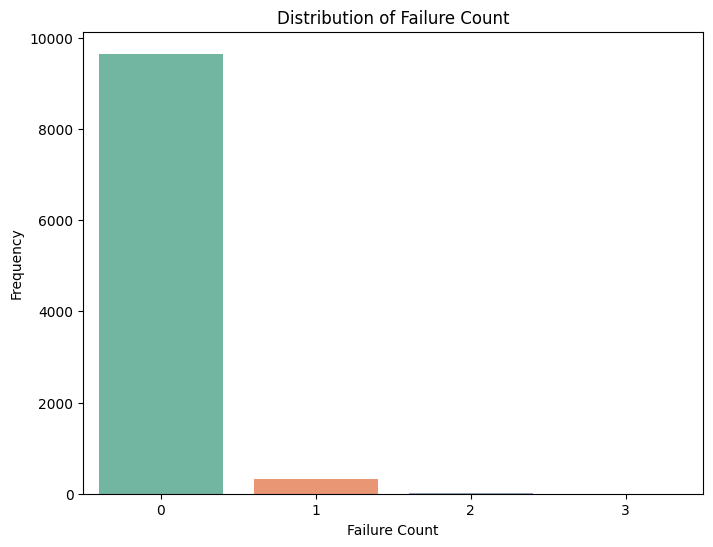

C:\Users\jaime\AppData\Local\Temp\ipykernel_16396\3505640987.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y='Temp_Difference', data=data_fe, palette='Set3')


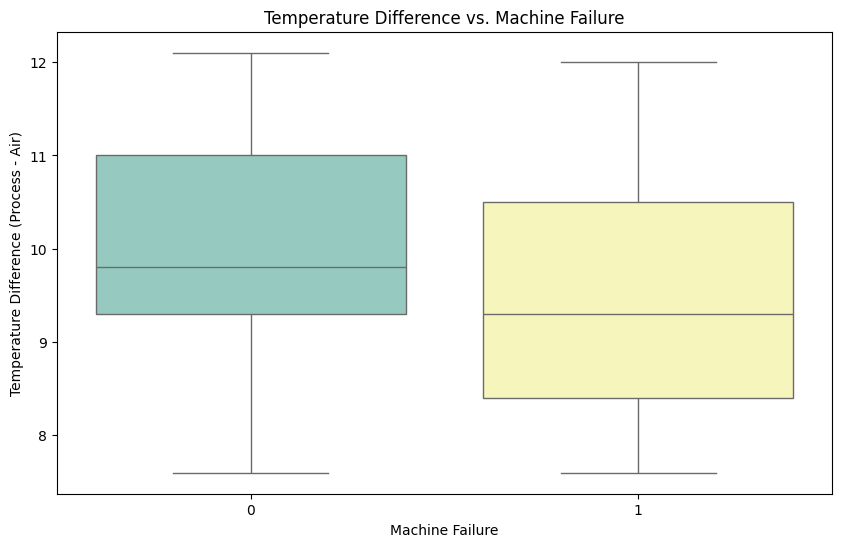

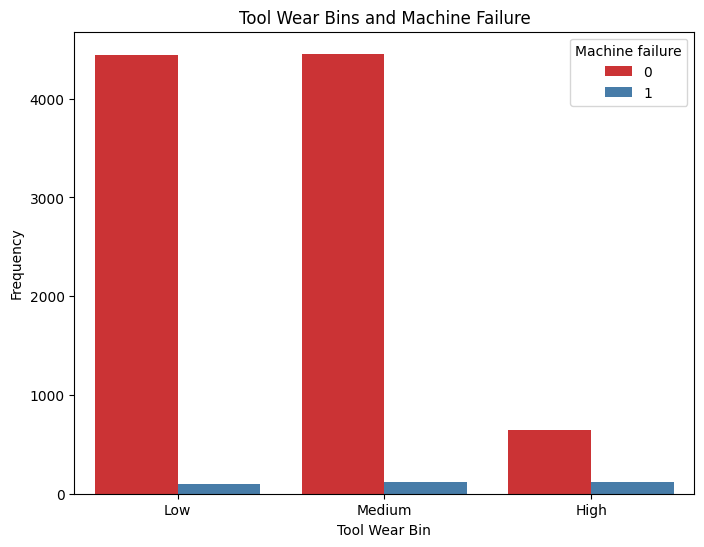

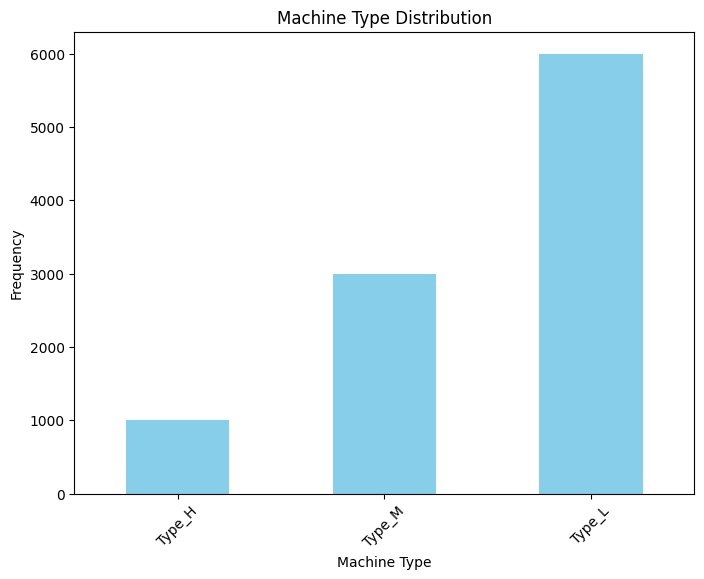

In [15]:

# 1. Visualize Interaction Term: Torque_RPM
plt.figure(figsize=(10, 6))
sns.histplot(data_fe['Torque_RPM'], kde=True, bins=30, color='blue')
plt.title('Distribution of Torque × Rotational Speed (Torque_RPM)')
plt.xlabel('Torque_RPM')
plt.ylabel('Frequency')
plt.show()

# 2. Visualize Aggregate Feature: Failure_Count
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure_Count', data=data_fe, palette='Set2')
plt.title('Distribution of Failure Count')
plt.xlabel('Failure Count')
plt.ylabel('Frequency')
plt.show()

# 3. Visualize Feature Interaction: Temp_Difference vs. Machine Failure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine failure', y='Temp_Difference', data=data_fe, palette='Set3')
plt.title('Temperature Difference vs. Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Temperature Difference (Process - Air)')
plt.show()

# 4. Visualize Binned Feature: Tool Wear Bin
plt.figure(figsize=(8, 6))
sns.countplot(x='Tool_Wear_Bin', hue='Machine failure', data=data_fe, palette='Set1')
plt.title('Tool Wear Bins and Machine Failure')
plt.xlabel('Tool Wear Bin')
plt.ylabel('Frequency')
plt.show()

# 5. One-Hot Encoded Feature: Machine Type
type_columns = [col for col in data_fe.columns if col.startswith('Type_')]
type_counts = data_fe[type_columns].sum().sort_values()

plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Machine Type Distribution')
plt.xlabel('Machine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## Model Training

Training Logistic Regression...
Performance of Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.98      0.99       102

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC: 0.981
----------------------------------------
Training Random Forest...
Performance of Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.98      0.99       102

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC: 0.989
----------------------------------------
Training Gradient Boosting...
Performance of Gradient Boosting:
              precision    recall  f1-score   

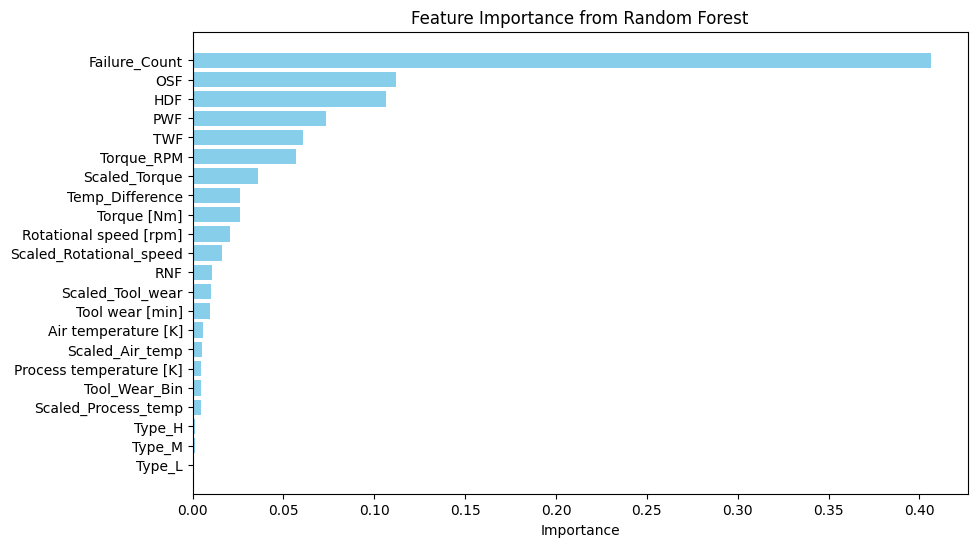

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. Prepare the data
X = data_fe.drop(['Machine failure'], axis=1)
y = data_fe['Machine failure']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate the model
    print(f"Performance of {model_name}:")
    print(classification_report(y_test, y_pred))
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC: {roc_auc:.3f}")
    print("-" * 40)

    # Store results
    results[model_name] = {
        "model": model,
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "roc_auc": roc_auc if y_pred_proba is not None else None
    }

# 3. Feature importance (for tree-based models)
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_indices], feature_importances[sorted_indices], color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.show()
